<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Data-Pre-processing" data-toc-modified-id="Data-Pre-processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Pre-processing</a></span></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Chat-Participants" data-toc-modified-id="Chat-Participants-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Chat Participants</a></span></li><li><span><a href="#More-fields" data-toc-modified-id="More-fields-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>More fields</a></span></li><li><span><a href="#Groupwise-stats" data-toc-modified-id="Groupwise-stats-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Groupwise stats</a></span></li><li><span><a href="#Separating-Media-and-Text-Messages" data-toc-modified-id="Separating-Media-and-Text-Messages-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Separating Media and Text Messages</a></span></li><li><span><a href="#Author-Stats" data-toc-modified-id="Author-Stats-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Author Stats</a></span></li><li><span><a href="#Unique-emojis" data-toc-modified-id="Unique-emojis-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Unique emojis</a></span></li><li><span><a href="#Used-emoji's" data-toc-modified-id="Used-emoji's-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Used emoji's</a></span></li><li><span><a href="#Top-10-emoji's" data-toc-modified-id="Top-10-emoji's-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Top 10 emoji's</a></span></li><li><span><a href="#Emoji-Distribution" data-toc-modified-id="Emoji-Distribution-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Emoji Distribution</a></span></li><li><span><a href="#Person-wise-emoji-Distribution" data-toc-modified-id="Person-wise-emoji-Distribution-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Person wise emoji Distribution</a></span></li><li><span><a href="#Engagement-by-weekday" data-toc-modified-id="Engagement-by-weekday-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>Engagement by weekday</a></span></li><li><span><a href="#Number-of-messages-sent-over-time" data-toc-modified-id="Number-of-messages-sent-over-time-3.12"><span class="toc-item-num">3.12&nbsp;&nbsp;</span>Number of messages sent over time</a></span></li><li><span><a href="#Most-Active-Chatter" data-toc-modified-id="Most-Active-Chatter-3.13"><span class="toc-item-num">3.13&nbsp;&nbsp;</span>Most Active Chatter</a></span></li><li><span><a href="#Number-of-words-used" data-toc-modified-id="Number-of-words-used-3.14"><span class="toc-item-num">3.14&nbsp;&nbsp;</span>Number of words used</a></span></li><li><span><a href="#Most-Common-words-(Group)" data-toc-modified-id="Most-Common-words-(Group)-3.15"><span class="toc-item-num">3.15&nbsp;&nbsp;</span>Most Common words (Group)</a></span></li><li><span><a href="#Most-common-words-used-by-participants" data-toc-modified-id="Most-common-words-used-by-participants-3.16"><span class="toc-item-num">3.16&nbsp;&nbsp;</span>Most common words used by participants</a></span></li><li><span><a href="#Time-of-the-day-with-most-messages" data-toc-modified-id="Time-of-the-day-with-most-messages-3.17"><span class="toc-item-num">3.17&nbsp;&nbsp;</span>Time of the day with most messages</a></span></li><li><span><a href="#Most-Active-hour-of-the-day" data-toc-modified-id="Most-Active-hour-of-the-day-3.18"><span class="toc-item-num">3.18&nbsp;&nbsp;</span>Most Active hour of the day</a></span></li></ul></li></ul></div>

# Libraries 

In [1]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import datetime
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

# Data Pre-processing 

In [2]:
def startsWithDateAndTimeAndroid(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

def startsWithDateAndTimeios(s):
    pattern = '^\[([0-9]+)([\/-])([0-9]+)([\/-])([0-9]+)[,]? ([0-9]+):([0-9][0-9]):([0-9][0-9])?[ ]?(AM|PM|am|pm)?\]' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [3]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [4]:
def getDataPointAndroid(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(':') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

def getDataPointios(line):
    splitLine = line.split('] ')
    dateTime = splitLine[0]
    if ',' in dateTime:
        date, time = dateTime.split(',')
    else:
        date, time = dateTime.split(' ')
    message = ' '.join(splitLine[1:])
    if FindAuthor(message):
        splitMessage = message.split(':')
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    if time[5]==":":
        time = time[:5]+time[-3:]
    else:
        if 'AM' in time or 'PM' in time:
            time = time[:6]+time[-3:]
        else:
            time = time[:6]
    return date, time, author, message

In [5]:
def dateconv(date):
  year=''
  if '-' in date:
    year = date.split('-')[2]
    if len(year) == 4:
      return datetime.datetime.strptime(date, "[%d-%m-%Y").strftime("%Y-%m-%d")
    elif len(year) ==2:
      return datetime.datetime.strptime(date, "[%d-%m-%y").strftime("%Y-%m-%d")
  elif '/' in date:
    year = date.split('/')[2]
    if len(year) == 4:
      return datetime.datetime.strptime(date, "[%d/%m/%Y").strftime("%Y-%m-%d")
    if len(year) ==2:
      return datetime.datetime.strptime(date, "[%d/%m/%y").strftime("%Y-%m-%d")

In [6]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

In [7]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = "WhatsApp Chat with Data Science.txt" 
with open(conversationPath, encoding="utf-8") as fp:
    device=''
    first=fp.readline()
    print(first)
    if '[' in first:
      device='ios'
    else:
      device="android"
    fp.readline() 
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        if device=="ios":
          line = line.strip()
          if startsWithDateAndTimeios(line):
            if len(messageBuffer) > 0:
              parsedData.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDataPointios(line)
            messageBuffer.append(message)
          else:
            line= (line.encode('ascii', 'ignore')).decode("utf-8")
            if startsWithDateAndTimeios(line):
              if len(messageBuffer) > 0:
                parsedData.append([date, time, author, ' '.join(messageBuffer)])
              messageBuffer.clear()
              date, time, author, message = getDataPointios(line)
              messageBuffer.append(message)
            else:
              messageBuffer.append(line)
        else:
          line = line.strip()
          if startsWithDateAndTimeAndroid(line):
            if len(messageBuffer) > 0:
              parsedData.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDataPointAndroid(line)
            messageBuffer.append(message)
          else:
            messageBuffer.append(line)

2018/11/05, 00:45 - +27 84 667 4237 created group "Data Science"



In [8]:
if device =='android':
        df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
        df["Date"] = pd.to_datetime(df["Date"])
        df = df.dropna()
        df["emoji"] = df["Message"].apply(split_count)
        URLPATTERN = r'(https?://\S+)'
        df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
else:
        df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
        df = df.dropna()
        df["Date"] = df["Date"].apply(dateconv)
        df["Date"] = pd.to_datetime(df["Date"],format='%Y-%m-%d')
        df["emoji"] = df["Message"].apply(split_count)
        URLPATTERN = r'(https?://\S+)'
        df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

# Data Analysis 

In [9]:
df.head()

Date   Time      Author  \
1 2019-09-22  22:59     Jocelyn   
2 2019-09-22  23:06     Jocelyn   
3 2019-09-22  23:06  Sylveester   
4 2019-09-22  23:06      Kerrin   
5 2019-09-22  23:07      Kerrin   

                                             Message      emoji  urlcount  
1   Hey guys, does anyone know if we have classes...        [🙈]         0  
2                                            Anyone?         []         0  
3                          😅🤣😂, what do you think???  [😅, 🤣, 😂]         0  
4                                       Krrrk krrrrk         []         0  
5                           Waiting for this message         []         0

In [10]:
df.tail()

Date   Time         Author  \
3522 2020-12-03  08:23          Taryn   
3523 2020-12-07  18:31         Mfundo   
3524 2020-12-07  18:31         Mfundo   
3525 2020-12-17  10:04          Ellie   
3526 2020-12-17  10:07  Katlego Kgosi   

                                                Message    emoji  urlcount  
3522                                          Thank you       []         0  
3523                               Capstone results out       []         0  
3524                                Go check on ienablr       []         0  
3525   The final results.  And congratulations to ev...      [😊]         0  
3526   Thanks broskie, see u in the other side🤣🤙🏼  E...  [🤣, 🤙🏼]         0

## Chat Participants

In [11]:
df.Author.unique()

array(['Jocelyn', 'Sylveester', 'Kerrin', 'Taryn', 'Katlego', 'Ellie',
       'Thabo', 'Nomz', 'Vusi', 'Phenyo', 'Mfundo', 'Hanna Sebolai',
       'Katlego Kgosi', '+27 73 246 5689', 'Tshepang', 'Isaac Thatayaone',
       'Kyle', 'Hanna Sebolai 2'], dtype=object)

In [12]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3439 entries, 1 to 3526
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3439 non-null   datetime64[ns]
 1   Time      3439 non-null   object        
 2   Author    3439 non-null   object        
 3   Message   3439 non-null   object        
 4   emoji     3439 non-null   object        
 5   urlcount  3439 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 188.1+ KB


## More fields 

In [13]:
# Get Year from Date
df['Date'] = pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year

# Get Month from Date
df['Month']=df['Date'].dt.month

# Get Day from Date
df['Day']=df['Date'].dt.day

# Get hour from Time
df['Hour'] = df['Time'].str[:2]

# Get Media shared in the Message
df['Media']=df['Message'].str.contains('<Media omitted>')

In [14]:
df.head()

Date   Time      Author  \
1 2019-09-22  22:59     Jocelyn   
2 2019-09-22  23:06     Jocelyn   
3 2019-09-22  23:06  Sylveester   
4 2019-09-22  23:06      Kerrin   
5 2019-09-22  23:07      Kerrin   

                                             Message      emoji  urlcount  \
1   Hey guys, does anyone know if we have classes...        [🙈]         0   
2                                            Anyone?         []         0   
3                          😅🤣😂, what do you think???  [😅, 🤣, 😂]         0   
4                                       Krrrk krrrrk         []         0   
5                           Waiting for this message         []         0   

   Year  Month  Day Hour  Media  
1  2019      9   22   22  False  
2  2019      9   22   23  False  
3  2019      9   22   23  False  
4  2019      9   22   23  False  
5  2019      9   22   23  False

## Groupwise stats 

In [15]:
total_messages = df.shape[0]
print(total_messages)

3439


In [16]:
media_messages = df[df['Message'] == ' <Media omitted>'].shape[0]
print(media_messages)

204


In [17]:
media_messages =df[(df['Message'] == ' <Media omitted>')|(df['Message'] == ' image omitted')|(df['Message'] == ' video omitted')|(df['Message'] == ' sticker omitted')].shape[0]
print(media_messages)

204


In [18]:
emojis = sum(df['emoji'].str.len())
print(emojis)

2668


In [19]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [20]:
links = np.sum(df.urlcount)

In [21]:
links

3

In [22]:
print("Group Wise Stats")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

Group Wise Stats
Messages: 3439
Media: 204
Emojis: 2668
Links: 3


## Separating Media and Text Messages

In [23]:
link_messages= df[df['urlcount']>0]
deleted_messages=df[(df["Message"] == " You deleted this message")| (df["Message"] == " This message was deleted.")|(df["Message"] == " You deleted this message.")]
media_messages_df = df[(df['Message'] == ' <Media omitted>')|(df['Message'] == ' image omitted')|(df['Message'] == ' video omitted')|(df['Message'] == ' sticker omitted')]
messages_df = df.drop(media_messages_df.index)
messages_df = messages_df.drop(deleted_messages.index)
messages_df = messages_df.drop(link_messages.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1
messages_df["emojicount"]= df['emoji'].str.len()

In [24]:
messages_df.head()

Date   Time      Author  \
1 2019-09-22  22:59     Jocelyn   
2 2019-09-22  23:06     Jocelyn   
3 2019-09-22  23:06  Sylveester   
4 2019-09-22  23:06      Kerrin   
5 2019-09-22  23:07      Kerrin   

                                             Message      emoji  urlcount  \
1   Hey guys, does anyone know if we have classes...        [🙈]         0   
2                                            Anyone?         []         0   
3                          😅🤣😂, what do you think???  [😅, 🤣, 😂]         0   
4                                       Krrrk krrrrk         []         0   
5                           Waiting for this message         []         0   

   Year  Month  Day Hour  Media  Letter_Count  Word_Count  MessageCount  \
1  2019      9   22   22  False            58          12             1   
2  2019      9   22   23  False             8           2             1   
3  2019      9   22   23  False            26           6             1   
4  2019      9   22   23  False            13           3             1   
5  2019      9   22   23  False            25           5             1   

   emojicount  
1           1  
2           0  
3           3  
4           0  
5           0

## Author Stats

In [25]:
l = messages_df.Author.unique()

for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(link_messages[link_messages['Author'] == l[i]]["urlcount"])   
  print('Links Sent', links)   
  print()

Stats of Jocelyn -
Messages Sent 77
Words per message 19.01298701298701
Media Messages Sent 6
Emojis Sent 46
Links Sent 1

Stats of Sylveester -
Messages Sent 320
Words per message 12.94375
Media Messages Sent 44
Emojis Sent 225
Links Sent 0

Stats of Kerrin -
Messages Sent 283
Words per message 9.282685512367491
Media Messages Sent 19
Emojis Sent 346
Links Sent 0

Stats of Taryn -
Messages Sent 447
Words per message 11.574944071588368
Media Messages Sent 20
Emojis Sent 346
Links Sent 0

Stats of Katlego -
Messages Sent 45
Words per message 12.822222222222223
Media Messages Sent 0
Emojis Sent 21
Links Sent 0

Stats of Ellie -
Messages Sent 728
Words per message 8.557692307692308
Media Messages Sent 52
Emojis Sent 442
Links Sent 2

Stats of Thabo -
Messages Sent 40
Words per message 18.525
Media Messages Sent 7
Emojis Sent 7
Links Sent 0

Stats of Nomz -
Messages Sent 323
Words per message 10.662538699690403
Media Messages Sent 13
Emojis Sent 307
Links Sent 0

Stats of Vusi -
Messages S

## Unique emojis

In [26]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

183


## Used emoji's 

In [61]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
print(emoji_dict)

[('😂', 962), ('🤣', 256), ('😅', 171), ('👏', 76), ('👀', 72), ('👏🏼', 69), ('😒', 54), ('🙆\u200d♂️', 45), ('🙄', 43), ('😹', 40), ('🏃🏾\u200d♂️', 31), ('😑', 26), ('💔', 23), ('💀', 23), ('🚮', 22), ('🚶🏻\u200d♂️', 21), ('😐', 20), ('🤦🏻\u200d♂️', 20), ('✊🏾', 18), ('🤷🏻\u200d♂', 17), ('🌚', 17), ('🥳', 17), ('🤷🏽\u200d♀️', 17), ('😄', 16), ('🙈', 14), ('🙏🏼', 14), ('🙆🏽', 14), ('😁', 14), ('😏', 13), ('🚶🏽\u200d♂️', 13), ('😱', 13), ('😭', 13), ('👏🏽', 11), ('🏃🏾', 11), ('🤔', 11), ('🙆🏽\u200d♂️', 11), ('⚰️', 11), ('😳', 10), ('😫', 10), ('🥴', 10), ('🎊', 9), ('🙆🏽\u200d♀️', 9), ('😀', 9), ('🦦', 9), ('💯', 7), ('🤷🏾\u200d♂️', 7), ('🤯', 7), ('🤷🏽\u200d♂️', 7), ('😢', 7), ('🤦🏽\u200d♀️', 7), ('🥺', 7), ('🎉', 6), ('👍🏽', 6), ('😃', 6), ('🚶🏻', 6), ('🤷🏻\u200d♂️', 6), ('🤛', 6), ('😩', 6), ('😨', 6), ('🙌🏽', 6), ('🎈', 5), ('😆', 5), ('🚶🏾\u200d♂️', 5), ('✊🏽', 5), ('🔥', 5), ('🤷🏽\u200d♀', 5), ('🥱', 5), ('👍🏼', 5), ('👏🏾', 5), ('😪', 5), ('👏🏻', 5), ('🤧', 4), ('😉', 4), ('😌', 4), ('🙋🏻\u200d♀️', 4), ('🤫', 4), ('😰', 4), ('💃🏽', 4), ('🙃', 4), ('👍', 4), 

## Top 10 emoji's 

In [62]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df.head(10)

emoji  count
0     😂    962
1     🤣    256
2     😅    171
3     👏     76
4     👀     72
5    👏🏼     69
6     😒     54
7  🙆‍♂️     45
8     🙄     43
9     😹     40

## Emoji Distribution 

In [29]:
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji', title= "Emoji's Used")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Person wise emoji Distribution

In [30]:
l = messages_df.Author.unique()
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  total_emojis_list = list([a for b in dummy_df.emoji for a in b])
  emoji_dict = dict(Counter(total_emojis_list))
  emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
  print('Emoji Distribution for', l[i])
  author_emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
  fig = px.pie(author_emoji_df, values='count', names='emoji')
  fig.update_traces(textposition='inside', textinfo='percent+label')
  fig.show()

Emoji Distribution for Jocelyn


Emoji Distribution for Sylveester


Emoji Distribution for Kerrin


Emoji Distribution for Taryn


Emoji Distribution for Katlego


Emoji Distribution for Ellie


Emoji Distribution for Thabo


Emoji Distribution for Nomz


Emoji Distribution for Vusi


Emoji Distribution for Phenyo


Emoji Distribution for Mfundo


Emoji Distribution for Hanna Sebolai


Emoji Distribution for Katlego Kgosi


Emoji Distribution for +27 73 246 5689


Emoji Distribution for Tshepang


Emoji Distribution for Isaac Thatayaone


Emoji Distribution for Kyle


Emoji Distribution for Hanna Sebolai 2


## Engagement by weekday

In [31]:
def f(i):
  l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  return l[i];
day_df=pd.DataFrame(messages_df["Message"])
day_df['day_of_date'] = messages_df['Date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(f)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)

In [32]:
fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=False
)
fig.show()

## Number of messages sent over time

In [58]:
date_df = messages_df.groupby("Date").sum()
date_df.reset_index(inplace=True)
fig = px.line(date_df, x="Date", y="MessageCount")
fig.update_xaxes(nticks=20)
# Edit the layout
#fig.update_layout(title='Name',
 #                  xaxis_title='Name',
  #                 yaxis_title='Name')
fig.show()
#fig.write_image("messages.png")

In [34]:
date_df["rolling"] = date_df["MessageCount"].rolling(30).mean()
fig = px.line(date_df, x="Date", y="rolling")
fig.update_xaxes(nticks=20)
fig.show()

## Most Active Chatter 

In [45]:
auth = messages_df.groupby("Author").sum()
auth.reset_index(inplace=True)
fig = px.bar(auth, y="Author", x="MessageCount", color='Author', orientation="h",
             color_discrete_sequence=["black", "brown", "rosybrown", "darkorange", "darkgoldenrod"],
             title="Number of Messages Sent Per User"
            )

fig.show()

## Number of words used  

In [38]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))

There are 158319 words in all the messages.


## Most Common words (Group)

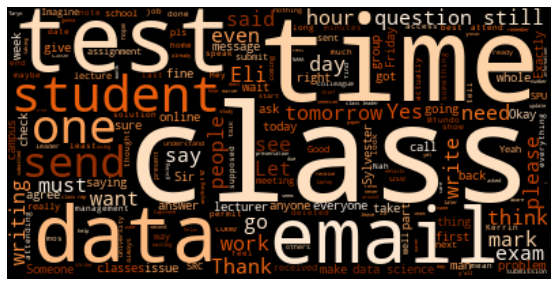

In [39]:
text = " ".join(review for review in messages_df.Message)
stopwords = set(STOPWORDS)
stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","la","eh","ne","le","ni","lo","Ma","Haa","ni", "u",
                 "us", "guy", "guys", "will", "now", "know"])
  # Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, colormap="Oranges").generate(text)
  # Display the generated image:
  # the matplotlib way:
  
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#plt.savefig("cloud.jpg")

## Most common words used by participants

Author name Jocelyn


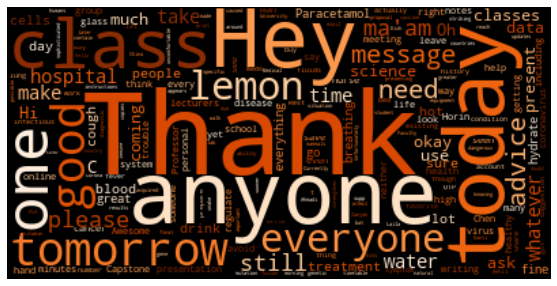

Author name Sylveester


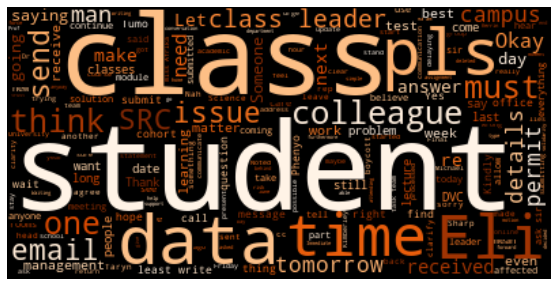

Author name Kerrin


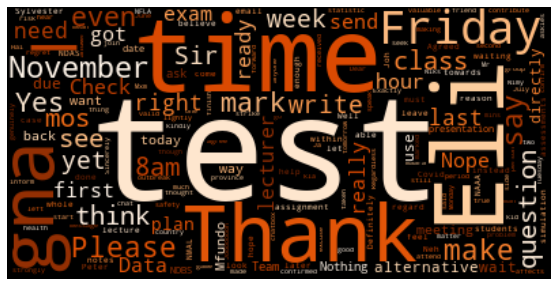

Author name Taryn


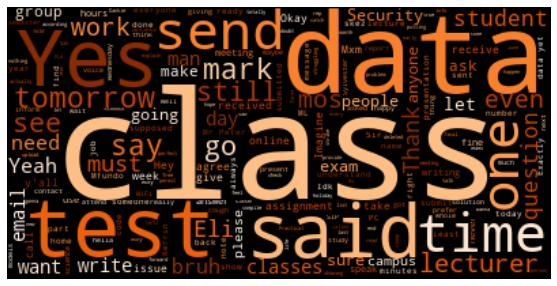

Author name Katlego


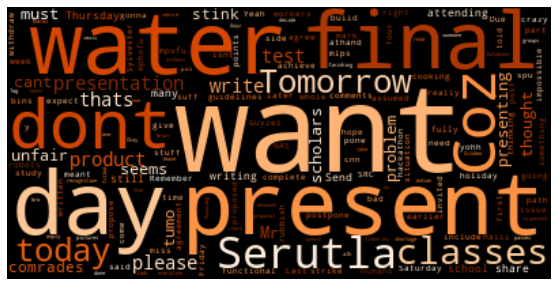

Author name Ellie


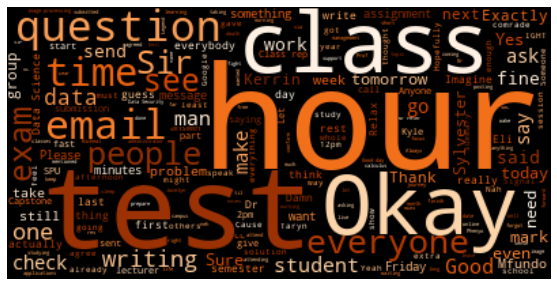

Author name Thabo


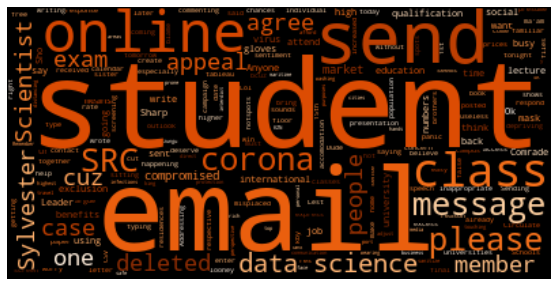

Author name Nomz


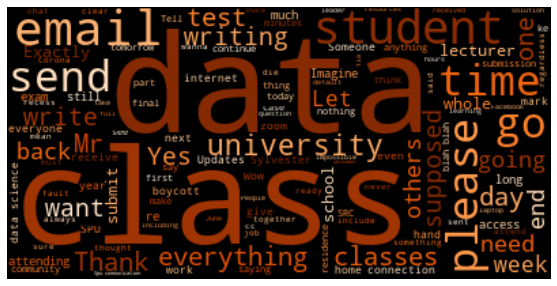

Author name Vusi
Author name Phenyo


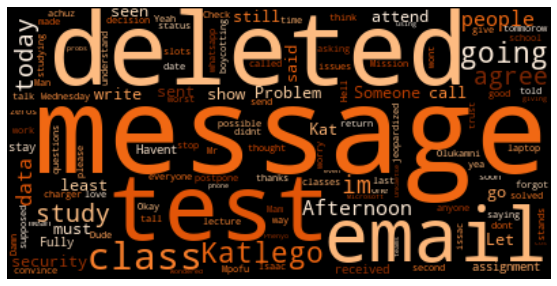

Author name Mfundo


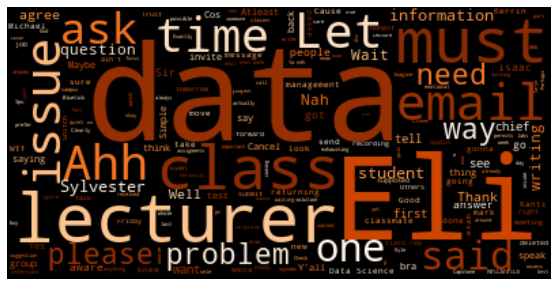

Author name Hanna Sebolai


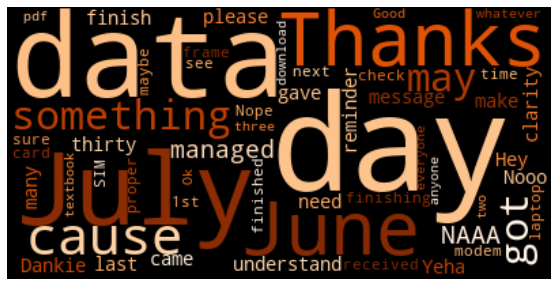

Author name Katlego Kgosi


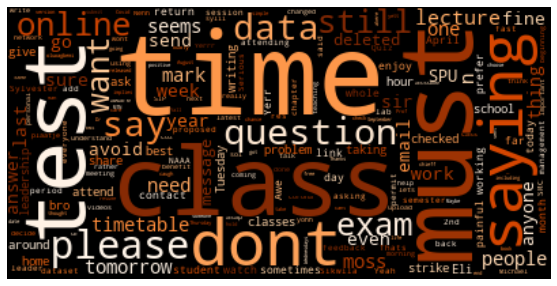

Author name +27 73 246 5689


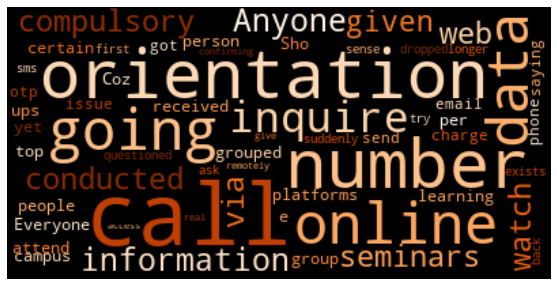

Author name Tshepang


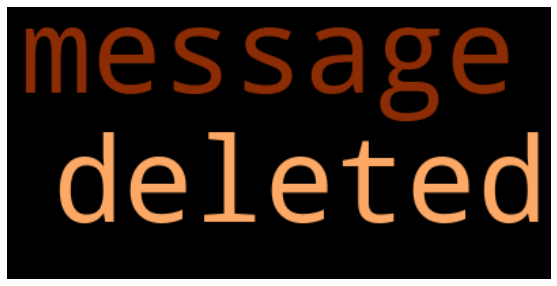

Author name Isaac Thatayaone


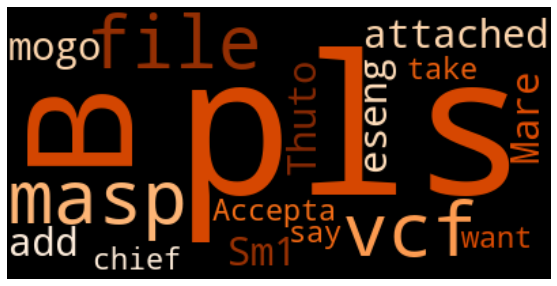

Author name Kyle


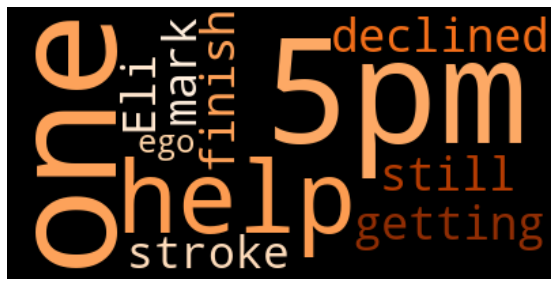

Author name Hanna Sebolai 2


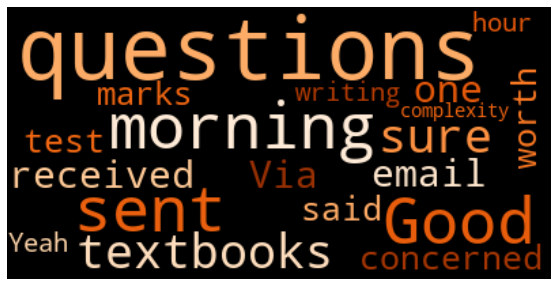

In [40]:
l = messages_df.Author.unique()
for i in range(len(l)):
    try:
        dummy_df = messages_df[messages_df['Author'] == l[i]]
        text = " ".join(review for review in dummy_df.Message)
        stopwords = set(STOPWORDS)
        stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","la","eh","ne","le","ni","lo","Ma","Haa","ni", "u",
                     "us", "guy", "guys", "will", "now", "know"])
        # Generate a word cloud image
        print('Author name',l[i])
        wordcloud = WordCloud(stopwords=stopwords, colormap="Oranges").generate(text)
        # Display the generated image:
        # the matplotlib way:

        plt.figure( figsize=(10,5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    except Exception:
        pass


## Time of the day with most messages 

In [44]:
timeChat = messages_df['Time'].value_counts().nlargest(15).rename_axis("Time").reset_index(name='Count')
fig = px.bar(timeChat, y="Time", x="Count", color='Time', orientation="h",
             color_discrete_sequence=["black", "brown", "rosybrown", "darkorange", "darkgoldenrod"],
             title="Most Active Time of the Day"
            )

fig.show()

## Most Active hour of the day

In [59]:
activeHour = messages_df.groupby(['Hour'])['Hour'].count().nlargest(15).rename_axis("Hour").reset_index(name='Count')
fig = px.bar(activeHour, y="Hour", x="Count", color='Hour', orientation="h",
             color_discrete_sequence=["black", "brown", "rosybrown", "darkorange", "darkgoldenrod"],
             title="Most Active Hour of the Day"
            )

fig.show()